In [3]:
import mlrose_hiive
import numpy as np
import pandas as pd
np.random.seed(1)

In [4]:
rhc_run_stats = pd.read_pickle("./pickles/n_queen_rhc_run_stats.pkl")
rhc_run_curves = pd.read_pickle("./pickles/n_queen_rhc_run_curves.pkl")
sa_run_stats = pd.read_pickle("./pickles/n_queen_sa_run_stats.pkl")
sa_run_curves = pd.read_pickle("./pickles/n_queen_sa_run_curves.pkl")
ga_run_stats = pd.read_pickle("./pickles/n_queen_ga_run_stats.pkl")
ga_run_curves = pd.read_pickle("./pickles/n_queen_ga_run_curves.pkl")
mmc_run_stats = pd.read_pickle("./pickles/n_queen_mmc_run_stats.pkl")
mmc_run_curves = pd.read_pickle("./pickles/n_queen_mmc_run_curves.pkl")

## Define a Fitness Function

In [5]:
# Custom fitness function for the N-Queens problem.
# It calculates the number of non-attacking queen pairs.
def queeens_max(state):
    fitness_cnt = 0
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # Check for non-attacking positions.
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j-i)) \
                and (state[j] != state[i] - (j-i)):
                
                # Increment the count for each non-attacking pair.
                fitness_cnt +=1

    return fitness_cnt

# Convert the custom fitness function for use with mlrose_hiive.
fitness_cust = mlrose_hiive.CustomFitness(queeens_max)

In [17]:
# Set the number of queens.
number_of_queens = 64 

# Calculate the total possible attacks using n(n-1)/2.
possible_attack = number_of_queens * (number_of_queens - 1) // 2

# Display the result.
print(f"With {number_of_queens} queens, there are {possible_attack} possible attacks.")

With 64 queens on the board, there are a maximum of 2016 possible attacks if every queen could attack each other.


### Random Hill Climb

In [7]:
%%time

# Define optimization problem.
problem = mlrose_hiive.DiscreteOpt(length=number_of_queens, 
                                   fitness_fn=fitness_cust, 
                                   maximize=True, 
                                   max_val=number_of_queens)

# Initialize RHC optimization with specific parameters.
runner_return = mlrose_hiive.RHCRunner(problem, 
                                       experiment_name="first_try", 
                                       iteration_list=[10000], 
                                       seed=1, 
                                       max_attempts=100, 
                                       restart_list=[100])

# Execute the RHC optimization.
rhc_run_stats, rhc_run_curves = runner_return.run()

Wall time: 16min 43s


In [56]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress.
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values.
print("Random Hill Climbing - Overall Results:")
print("--------------------------------------")
print("Average Fitness:", last_iters.Fitness.mean())
print("Maximum Fitness:", last_iters.Fitness.max())

# Identify and display the longest iteration time.
print("Average Time for an Iteration:", last_iters.Time.mean())
print("\n")

# Group results by Number of Restarts and calculate the average fitness.
print("Random Hill Climbing - Average Fitness by Number of Restarts:")
print("-------------------------------------------------------------")
print(last_iters.groupby("current_restart").Fitness.mean())
print("\n")

# Group results by Number of Restarts and calculate the average time taken.
print("Random Hill Climbing - Average Time by Number of Restarts:")
print("----------------------------------------------------------")
print(last_iters.groupby("current_restart").Time.mean())

Random Hill Climbing - Overall Results:
--------------------------------------
Average Fitness: 1998.6336633663366
Maximum Fitness: 2006.0
Average Time for an Iteration: 374.74908096237624


Random Hill Climbing - Average Fitness by Number of Restarts:
-------------------------------------------------------------
current_restart
0      2001.0
1      1997.0
2      2000.0
3      2001.0
4      1996.0
        ...  
96     2004.0
97     1996.0
98     1994.0
99     1994.0
100    2006.0
Name: Fitness, Length: 101, dtype: float64


Random Hill Climbing - Average Time by Number of Restarts:
----------------------------------------------------------
current_restart
0         1.008904
1         2.571389
2         4.307431
3         6.620717
4         8.229219
          ...     
96      934.952823
97      950.870112
98      966.686119
99      980.167464
100    1003.025922
Name: Time, Length: 101, dtype: float64


In [40]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress.
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values.
average_fitness = last_iters.Fitness.mean()
max_fitness = last_iters.Fitness.max()

# Display the fitness results.
print("Average Fitness:", average_fitness)
print("Maximum Fitness:", max_fitness)

# Identify and display the longest iteration time.
max_time = last_iters.Time.max()
print("Longest Time for an Iteration:", max_time)

Average Fitness: 1998.6336633663366
Maximum Fitness: 2006.0
Longest Time for an Iteration: 1003.0259215000001


In [58]:
# 1. Identify the best parameter set based on maximum fitness.
best_restart = last_iters.loc[last_iters['Fitness'].idxmax()]['current_restart']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = last_iters[last_iters['current_restart'] == best_restart]

# 3. Compute the metrics for the best parameter set.
print(f"Random Hill Climbing - Results for Best Restart Parameter ({best_restart}):")
print("--------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

Random Hill Climbing - Results for Best Restart Parameter (100):
--------------------------------------------------------------------------
Average Fitness: 2006.0
Maximum Fitness: 2006.0
Average Time for an Iteration: 1003.0259215000001




In [10]:
# Find the index of the run with the highest fitness value
best_index_in_curve = rhc_run_curves.Fitness.idxmax()

# Extract the restart setting corresponding to the best fitness achieved
best_restart = rhc_run_curves.iloc[best_index_in_curve].current_restart

# Filter the curves to only include data from the best restart setting
best_curve = rhc_run_curves[rhc_run_curves.current_restart == best_restart]

# Reset the index for the filtered data for ease of access
best_curve.reset_index(drop=True, inplace=True)

best_restart

100.0

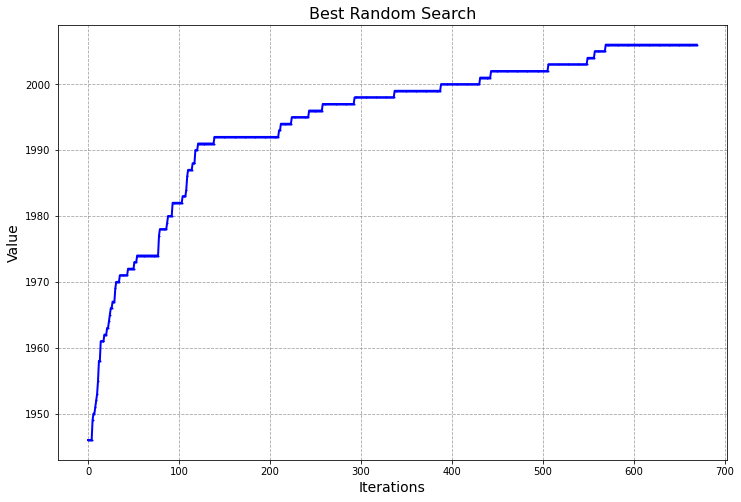

In [12]:
# Plotting the best curve's fitness over iterations
ax = best_curve.Fitness.plot(lw=2, 
                             color='blue',     # Set the line color to blue
                             marker='.', 
                             markersize=2, 
                             figsize=(12,8), 
                             grid=True,        # Enable grid
                             title='Best Random Search')

# Set x-axis label with increased font size
ax.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax.set_title('Best Random Search', fontsize=16)

# Set grid appearance to grey and dotted
ax.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

## Simulated Annealing

In [18]:
%%time

# Set up and execute Simulated Annealing optimization using various temperatures and decay strategies.
# The goal is to see how different parameters affect the performance of the algorithm on the specified problem.
sa = mlrose_hiive.SARunner(problem, 
                           experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=1, 
                           max_attempts=100)

# Run the Simulated Annealing and capture results.
sa_run_stats, sa_run_curves = sa.run()

Wall time: 3min 47s


In [57]:
# Filter out the initial state (Iteration = 0) from the Simulated Annealing run stats.
last_iters_sa = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()

# Convert Temperature objects to their string representations.
last_iters_sa["TempStr"] = last_iters_sa["Temperature"].apply(str)

# Group the results by the string representation of Temperature and calculate the average fitness.
print("SA - Average Fitness by Temperature:")
print("--------------------------------")
grouped_by_temperature = last_iters_sa.groupby("TempStr").Fitness.mean()
print(grouped_by_temperature)
print("\n")

# Additionally, you can check the average time taken for each temperature.
print("SA - Average Time by Temperature:")
print("----------------------------")
grouped_time_by_temperature = last_iters_sa.groupby("TempStr").Time.mean()
print(grouped_time_by_temperature)

SA - Average Fitness by Temperature:
--------------------------------
TempStr
1       2010.0
10      2010.5
100     2009.0
1000    2012.5
250     2010.5
2500    2010.5
50      2006.5
500     2009.0
5000    2009.0
Name: Fitness, dtype: float64


SA - Average Time by Temperature:
----------------------------
TempStr
1        9.184945
10      10.752644
100      9.581575
1000    18.875782
250     13.335927
2500    15.919112
50       6.714293
500     13.745182
5000    15.032849
Name: Time, dtype: float64


In [43]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress with Simulated Annealing.
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values.
average_fitness = last_iters.Fitness.mean()
max_fitness = last_iters.Fitness.max()

# Display the fitness results.
print("Average Fitness:", average_fitness)
print("Maximum Fitness:", max_fitness)

# Calculate and display the average iteration time.
average_time = last_iters.Time.mean()
print("Average Time for an Iteration:", average_time)

Average Fitness: 2009.7222222222222
Maximum Fitness: 2013.0
Average Time for an Iteration: 12.571367538888921


In [59]:
# 1. Identify the best parameter set based on maximum fitness.
best_temp = sa_run_stats.loc[sa_run_stats['Fitness'].idxmax()]['Temperature']
best_decay_strategy = sa_run_stats.loc[sa_run_stats['Fitness'].idxmax()]['schedule_type']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = sa_run_stats[(sa_run_stats['Temperature'] == best_temp) & 
                                (sa_run_stats['schedule_type'] == best_decay_strategy)]

# 3. Compute the metrics for the best parameter set.
print(f"Simulated Annealing - Results for Best Parameters (Temperature: {best_temp}, Decay Strategy: {best_decay_strategy}):")
print("-----------------------------------------------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

Simulated Annealing - Results for Best Parameters (Temperature: 1000, Decay Strategy: str):
-----------------------------------------------------------------------------------------------------------------
Average Fitness: 1977.0
Maximum Fitness: 2013.0
Average Time for an Iteration: 7.73908455000003




In [44]:
# Find the index of the run with the highest fitness value.
best_index_in_curve = sa_run_curves.Fitness.idxmax()

# Extract the temperature setting corresponding to the best fitness achieved.
best_temperature = sa_run_curves.iloc[best_index_in_curve].Temperature

# Filter the curves to only include data from the best temperature setting.
best_curve = sa_run_curves[sa_run_curves.Temperature == best_temperature]

# Reset the index for the filtered data for ease of access.
best_curve.reset_index(drop=True, inplace=True)

best_temperature

GeomDecay(init_temp=1000, decay=0.99, min_temp=0.001)

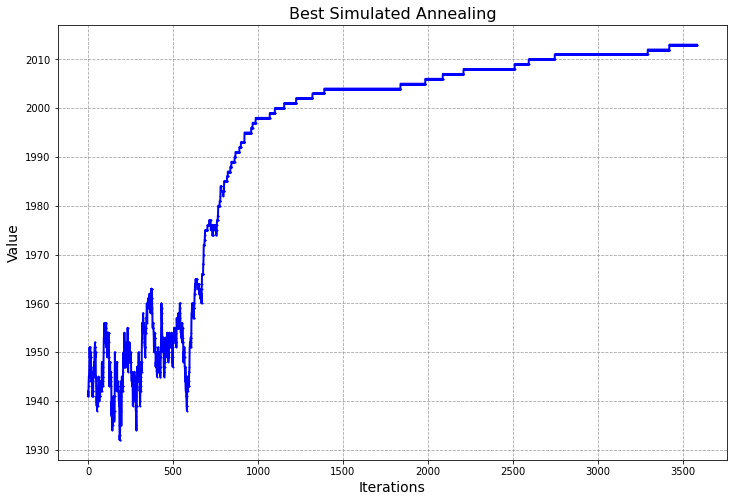

In [23]:
# Plotting the best curve's fitness over iterations
ax = best_curve.Fitness.plot(lw=2, 
                             color='blue',     # Set the line color to blue
                             marker='.', 
                             markersize=2, 
                             figsize=(12,8), 
                             grid=True,        # Enable grid
                             title='Best Simulated Annealing')

# Set x-axis label with increased font size
ax.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax.set_title('Best Simulated Annealing', fontsize=16)

# Set grid appearance to grey and dotted
ax.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

## Genetic Alg

In [24]:
%%time

# Set up Genetic Algorithm (GA) runner with various parameters for optimization.
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=1,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[50, 200, 500],     # Different population sizes to experiment with.
                          mutation_rates=[0.1, 0.25, 0.5])     # Different mutation rates to experiment with.

# Execute the GA optimization and store results.
ga_run_stats, ga_run_curves = ga.run()

Wall time: 39min 20s


In [54]:
# Filter out the data from the initial state (Iteration = 0) for the Genetic Algorithm run.
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()

# Print the maximum fitness, average fitness, and the average time per iteration for the Genetic Algorithm.
print("Genetic Algorithm - Max Fitness, Average Fitness, and Average Time per Iteration:")
print("--------------------------------------------------------------------------------")
print("Max Fitness:", last_iters.Fitness.max())
print("Average Fitness:", last_iters.Fitness.mean())
print("Average Time per Iteration:", last_iters.Time.mean())
print("\n")

# Group the results by Mutation Rate and calculate the average fitness for each rate.
print("Genetic Algorithm - Average Fitness by Mutation Rate:")
print("-----------------------------------------------------")
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print("\n")

# Group the results by Mutation Rate and calculate the average time taken for each rate.
print("Genetic Algorithm - Average Time by Mutation Rate:")
print("--------------------------------------------------")
print(last_iters.groupby("Mutation Rate").Time.mean())
print("\n")

# Group the results by Population Size and calculate the average fitness for each population size.
print("Genetic Algorithm - Average Fitness by Population Size:")
print("-------------------------------------------------------")
print(last_iters.groupby("Population Size").Fitness.mean())
print("\n")

# Group the results by Population Size and calculate the average time taken for each population size.
print("Genetic Algorithm - Average Time by Population Size:")
print("---------------------------------------------------")
print(last_iters.groupby("Population Size").Time.mean())

Genetic Algorithm - Max Fitness, Average Fitness, and Average Time per Iteration:
--------------------------------------------------------------------------------
Max Fitness: 2013.0
Average Fitness: 2008.0
Average Time per Iteration: 262.31073840000016


Genetic Algorithm - Average Fitness by Mutation Rate:
-----------------------------------------------------
Mutation Rate
0.10    2006.666667
0.25    2009.666667
0.50    2007.666667
Name: Fitness, dtype: float64


Genetic Algorithm - Average Time by Mutation Rate:
--------------------------------------------------
Mutation Rate
0.10    217.046512
0.25    286.277349
0.50    283.608354
Name: Time, dtype: float64


Genetic Algorithm - Average Fitness by Population Size:
-------------------------------------------------------
Population Size
50     2002.666667
200    2009.000000
500    2012.333333
Name: Fitness, dtype: float64


Genetic Algorithm - Average Time by Population Size:
---------------------------------------------------
Popula

In [26]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress with Genetic Algorithm.
last_iters_ga = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values for the GA run.
average_fitness_ga = last_iters_ga.Fitness.mean()
max_fitness_ga = last_iters_ga.Fitness.max()

# Display the fitness results from the GA run.
print("GA Average Fitness:", average_fitness_ga)
print("GA Maximum Fitness:", max_fitness_ga)

# Calculate and display the average iteration time for the GA run.
average_time_ga = last_iters_ga.Time.mean()
print("GA Average Time for an Iteration:", average_time_ga)

GA Average Fitness: 2008.0
GA Maximum Fitness: 2013.0
GA Average Time for an Iteration: 262.31073840000016


In [61]:
# 1. Identify the best parameter set based on maximum fitness.
best_pop_size = ga_run_stats.loc[ga_run_stats['Fitness'].idxmax()]['Population Size']
best_mutation_rate = ga_run_stats.loc[ga_run_stats['Fitness'].idxmax()]['Mutation Rate']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = ga_run_stats[(ga_run_stats['Population Size'] == best_pop_size) & 
                                (ga_run_stats['Mutation Rate'] == best_mutation_rate)]

# 3. Compute the metrics for the best parameter set.
print(f"Genetic Algorithm - Results for Best Parameters (Population Size: {best_pop_size}, Mutation Rate: {best_mutation_rate}):")
print("---------------------------------------------------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

Genetic Algorithm - Results for Best Parameters (Population Size: 500, Mutation Rate: 0.25):
---------------------------------------------------------------------------------------------------------------------
Average Fitness: 1984.0
Maximum Fitness: 2013.0
Average Time for an Iteration: 323.6664110500003




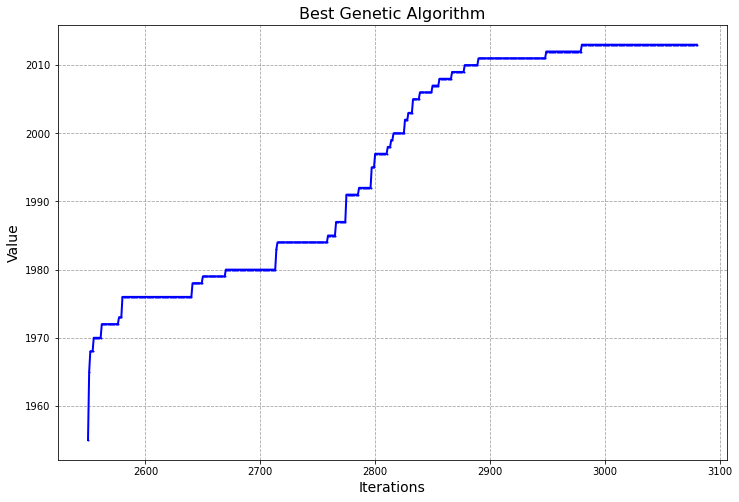

In [31]:
# Find the parameters corresponding to the run with the highest fitness value for GA
best_params = ga_run_curves.iloc[ga_run_curves.Fitness.idxmax()]

best_population_size = best_params['Population Size']
best_mutation_rate = best_params['Mutation Rate']

# Filter the curves to only include data from the best run
best_ga_curve = ga_run_curves[(ga_run_curves['Population Size'] == best_population_size) & 
                              (ga_run_curves['Mutation Rate'] == best_mutation_rate)]

# Plotting the best GA curve's fitness over iterations
ax = best_ga_curve.Fitness.plot(lw=2, 
                                color='blue',     # Set the line color to blue
                                marker='.', 
                                markersize=2, 
                                figsize=(12,8), 
                                grid=True,        # Enable grid
                                title='Best Genetic Algorithm')

# Set x-axis label with increased font size
ax.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax.set_title('Best Genetic Algorithm', fontsize=16)

# Set grid appearance to grey and dotted
ax.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

## MIMIC

In [32]:
%%time

# Initialize MIMIC optimization with various settings.
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                               experiment_name="MMC_Exp",
                               seed=1,
                               iteration_list=[100000],
                               max_attempts=100,
                               population_sizes=[50, 200, 500],
                               keep_percent_list=[0.25, 0.5, 0.75],
                               use_fast_mimic=True)

# Run MIMIC and capture the statistics and curve results.
mmc_run_stats, mmc_run_curves = mmc.run()

In [53]:
# Filter out the data from the initial state (Iteration = 0) for the MIMIC run.
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()

# Print the maximum fitness, average fitness, and the average time per iteration.
print("MIMIC - Max Fitness, Average Fitness, and Average Time per Iteration:")
print("--------------------------------------------------------------------")
print("Max Fitness:", last_iters.Fitness.max())
print("Average Fitness:", last_iters.Fitness.mean())
print("Average Time per Iteration:", last_iters.Time.mean())
print("\n")

# Group the results by Keep Percent and calculate the average fitness and average time for each percent.
print("MIMIC - Average Fitness by Keep Percent:")
print("----------------------------------------")
print(last_iters.groupby("Keep Percent").Fitness.mean())
print("\n")

print("MIMIC - Average Time by Keep Percent:")
print("------------------------------------")
print(last_iters.groupby("Keep Percent").Time.mean())
print("\n")

# Group the results by Population Size and calculate the average fitness for each population size.
print("MIMIC - Average Fitness by Population Size:")
print("-------------------------------------------")
print(last_iters.groupby("Population Size").Fitness.mean())
print("\n")

# Group the results by Population Size and calculate the average time taken for each population size.
print("MIMIC - Average Time by Population Size:")
print("---------------------------------------")
print(last_iters.groupby("Population Size").Time.mean())

MIMIC - Max Fitness, Average Fitness, and Average Time per Iteration:
--------------------------------------------------------------------
Max Fitness: 1986.0
Average Fitness: 1972.7777777777778
Average Time per Iteration: 1255.794327588889


MIMIC - Average Fitness by Keep Percent:
----------------------------------------
Keep Percent
0.25    1972.333333
0.50    1975.000000
0.75    1971.000000
Name: Fitness, dtype: float64


MIMIC - Average Time by Keep Percent:
------------------------------------
Keep Percent
0.25    1167.415544
0.50    1296.943698
0.75    1303.023740
Name: Time, dtype: float64


MIMIC - Average Fitness by Population Size:
-------------------------------------------
Population Size
50     1960.333333
200    1974.666667
500    1983.333333
Name: Fitness, dtype: float64


MIMIC - Average Time by Population Size:
---------------------------------------
Population Size
50      405.084321
200    1125.682980
500    2236.615681
Name: Time, dtype: float64


In [35]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress with MIMIC.
last_iters_mmc = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values for the MMC run.
average_fitness_mmc = last_iters_mmc.Fitness.mean()
max_fitness_mmc = last_iters_mmc.Fitness.max()

# Display the fitness results from the MMC run.
print("MMC Average Fitness:", average_fitness_mmc)
print("MMC Maximum Fitness:", max_fitness_mmc)

# Calculate and display the average iteration time for the MMC run.
average_time_mmc = last_iters_mmc.Time.mean()
print("MMC Average Time for an Iteration:", average_time_mmc)

MMC Average Fitness: 1972.7777777777778
MMC Maximum Fitness: 1986.0
MMC Average Time for an Iteration: 1255.794327588889


In [62]:
# 1. Identify the best parameter set based on maximum fitness.
best_pop_size = mmc_run_stats.loc[mmc_run_stats['Fitness'].idxmax()]['Population Size']
best_keep_percent = mmc_run_stats.loc[mmc_run_stats['Fitness'].idxmax()]['Keep Percent']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = mmc_run_stats[(mmc_run_stats['Population Size'] == best_pop_size) & 
                                 (mmc_run_stats['Keep Percent'] == best_keep_percent)]

# 3. Compute the metrics for the best parameter set.
print(f"MIMIC - Results for Best Parameters (Population Size: {best_pop_size}, Keep Percent: {best_keep_percent}):")
print("----------------------------------------------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

MIMIC - Results for Best Parameters (Population Size: 500, Keep Percent: 0.5):
----------------------------------------------------------------------------------------------------------------
Average Fitness: 1963.5
Maximum Fitness: 1986.0
Average Time for an Iteration: 1178.1873846500011




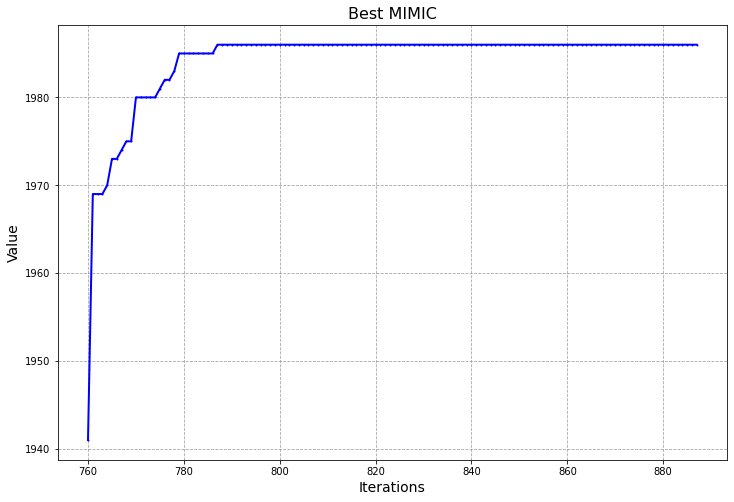

In [37]:
# Find the parameters corresponding to the run with the highest fitness value for MMC
best_params_mmc = mmc_run_curves.iloc[mmc_run_curves.Fitness.idxmax()]

best_population_size_mmc = best_params_mmc['Population Size']
best_keep_percent = best_params_mmc['Keep Percent']

# Filter the curves to only include data from the best MMC run
best_mmc_curve = mmc_run_curves[(mmc_run_curves['Population Size'] == best_population_size_mmc) & 
                                (mmc_run_curves['Keep Percent'] == best_keep_percent)]

# Plotting the best MMC curve's fitness over iterations
ax_mmc = best_mmc_curve.Fitness.plot(lw=2, 
                                     color='blue',     # Set the line color to green for distinction
                                     marker='.', 
                                     markersize=2, 
                                     figsize=(12,8), 
                                     grid=True,        # Enable grid
                                     title='Best MIMIC')

# Set x-axis label with increased font size
ax_mmc.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax_mmc.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax_mmc.set_title('Best MIMIC', fontsize=16)

# Set grid appearance to grey and dotted
ax_mmc.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

In [38]:
rhc_run_stats.to_pickle("./n_queen_rhc_run_stats.pkl")
rhc_run_curves.to_pickle("./n_queen_rhc_run_curves.pkl")
sa_run_stats.to_pickle("./n_queen_sa_run_stats.pkl")
sa_run_curves.to_pickle("./n_queen_sa_run_curves.pkl")
ga_run_stats.to_pickle("./n_queen_ga_run_stats.pkl")
ga_run_curves.to_pickle("./n_queen_ga_run_curves.pkl")
mmc_run_stats.to_pickle("./n_queen_mmc_run_stats.pkl")
mmc_run_curves.to_pickle("./n_queen_mmc_run_curves.pkl")

In [39]:
df = pd.read_pickle("./n_queen_rhc_run_stats.pkl")

df

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,1941.0,0,0.006555,"[37, 43, 12, 8, 63, 9, 11, 5, 15, 0, 16, 1, 12...",100,10000,0
1,10000,2001.0,439,1.008904,"[37, 43, 12, 53, 26, 16, 11, 40, 46, 53, 16, 2...",100,10000,0
2,0,1944.0,439,1.015031,"[45, 0, 25, 40, 7, 7, 54, 33, 58, 7, 34, 4, 5,...",100,10000,1
3,10000,1997.0,980,2.571389,"[45, 17, 25, 14, 9, 6, 54, 60, 43, 48, 34, 4, ...",100,10000,1
4,0,1947.0,980,2.578048,"[2, 26, 51, 4, 16, 13, 4, 30, 52, 20, 36, 34, ...",100,10000,2
...,...,...,...,...,...,...,...,...
197,10000,1994.0,55098,966.686119,"[3, 50, 29, 32, 5, 39, 60, 62, 7, 34, 30, 8, 4...",100,10000,98
198,0,1955.0,55098,966.777940,"[15, 17, 46, 39, 28, 31, 14, 3, 21, 39, 55, 30...",100,10000,99
199,10000,1994.0,55531,980.167464,"[15, 32, 46, 39, 20, 31, 14, 3, 21, 34, 57, 30...",100,10000,99
200,0,1946.0,55531,980.262416,"[60, 19, 4, 10, 56, 55, 0, 58, 15, 34, 38, 54,...",100,10000,100
